In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [ ]:
train=pd.read_csv('/content/train.csv')

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
test=pd.read_csv('/content/test.csv')

In [ ]:
train.columns

Index(['Id', 'AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD ', 'BN',
       'BP', 'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS',
       'CU', 'CW ', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY',
       'EB', 'EE', 'EG', 'EH', 'EJ', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI',
       'FL', 'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL', 'Class'],
      dtype='object')

In [ ]:
train.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      557 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      615 non-null    float64
 17  CC      614 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

#EJ -> object datatype

Class Distribution:
0    509
1    108
Name: Class, dtype: int64


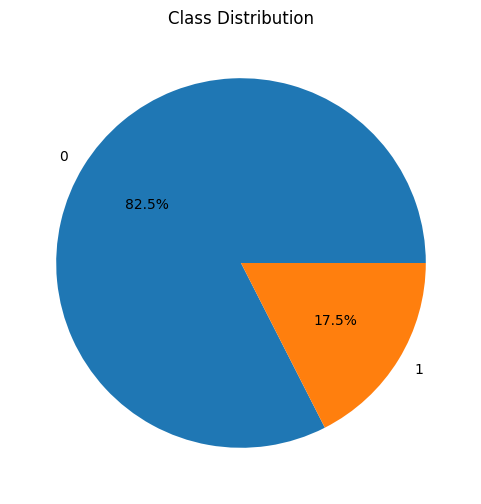

Imbalance Ratio: 0.21


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'train' is your training dataset and 'Class' is the column containing the class labels
class_counts = train['Class'].value_counts()

print("Class Distribution:")
print(class_counts)

# Create a pie chart to visualize the class distribution
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
plt.title('Class Distribution')
plt.show()

# Calculate the class imbalance ratio
imbalance_ratio = class_counts.min() / class_counts.max()

print("Imbalance Ratio: {:.2f}".format(imbalance_ratio))

#Dataset -> highly unbalanced

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
AB,617.0,0.477149,0.468388,0.081187,0.252107,0.354659,0.559763,6.161666
AF,617.0,3502.013221,2300.322717,192.593280,2197.345480,3120.318960,4361.637390,28688.187660
AH,617.0,118.624513,127.838950,85.200147,85.200147,85.200147,113.739540,1910.123198
AM,617.0,38.968552,69.728226,3.177522,12.270314,20.533110,39.139886,630.518230
AR,617.0,10.128242,10.518877,8.138688,8.138688,8.138688,8.138688,178.943634
AX,617.0,5.545576,2.551696,0.699861,4.128294,5.031912,6.431634,38.270880
AY,617.0,0.060320,0.416817,0.025578,0.025578,0.025578,0.036845,10.315851
AZ,617.0,10.566447,4.350645,3.396778,8.129580,10.461320,12.969516,38.971568
BC,617.0,8.053012,65.166943,1.229900,1.229900,1.229900,5.081244,1463.693448
BD,617.0,5350.388655,3021.326641,1693.624320,4155.702870,4997.960730,6035.885700,53060.599240


In [ ]:
train.columns

Index(['Id', 'AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD ', 'BN',
       'BP', 'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS',
       'CU', 'CW ', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY',
       'EB', 'EE', 'EG', 'EH', 'EJ', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI',
       'FL', 'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL', 'Class'],
      dtype='object')

In [ ]:
train.shape

(617, 58)

In [ ]:
train.isnull().sum()

Id        0
AB        0
AF        0
AH        0
AM        0
AR        0
AX        0
AY        0
AZ        0
BC        0
BD        0
BN        0
BP        0
BQ       60
BR        0
BZ        0
CB        2
CC        3
CD        0
CF        0
CH        0
CL        0
CR        0
CS        0
CU        0
CW        0
DA        0
DE        0
DF        0
DH        0
DI        0
DL        0
DN        0
DU        1
DV        0
DY        0
EB        0
EE        0
EG        0
EH        0
EJ        0
EL       60
EP        0
EU        0
FC        1
FD        0
FE        0
FI        0
FL        1
FR        0
FS        2
GB        0
GE        0
GF        0
GH        0
GI        0
GL        1
Class     0
dtype: int64

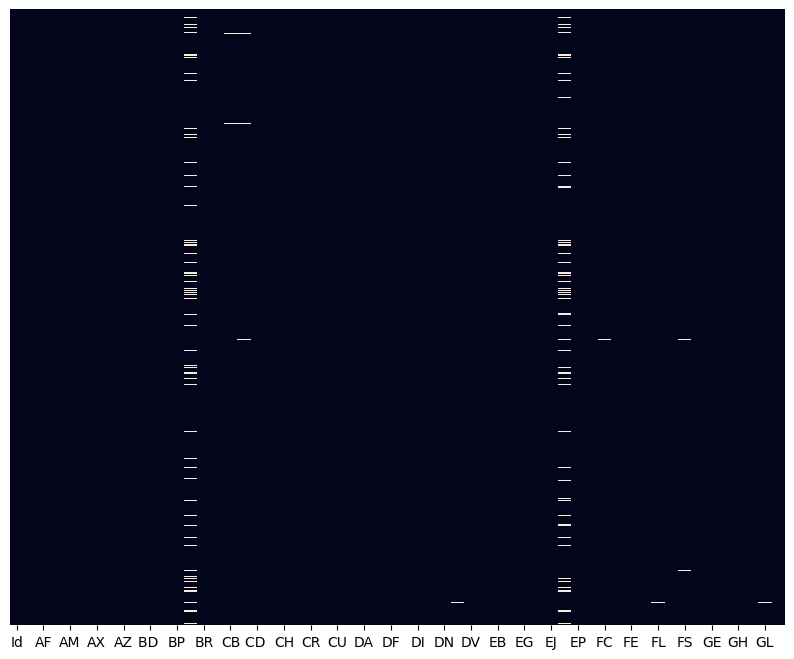

In [ ]:
plt.figure(figsize=(10, 8))  # Set the figure size to 10 inches by 8 inches
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

plt.show()

BQ(60)  CB(2)  CC(3)  DU(1)  EL(60)  FC(1)  FL(1)
 FS(2)  GL(1)

<Axes: >

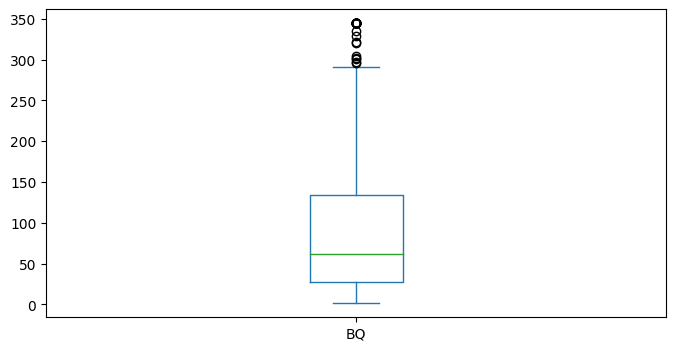

In [ ]:
train["BQ"].plot.box(figsize=(8,4))

<Axes: >

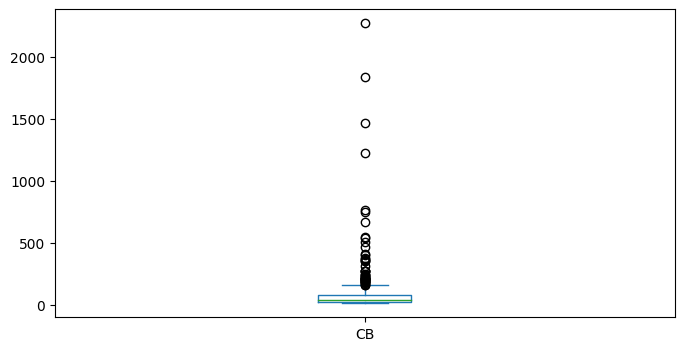

In [ ]:
train["CB"].plot.box(figsize=(8,4))

<Axes: >

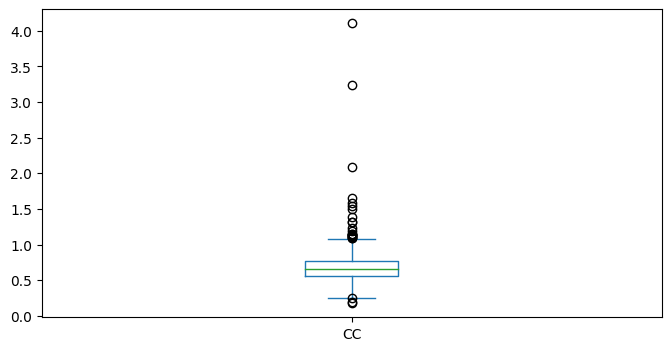

In [ ]:
train["CC"].plot.box(figsize=(8,4))

<Axes: >

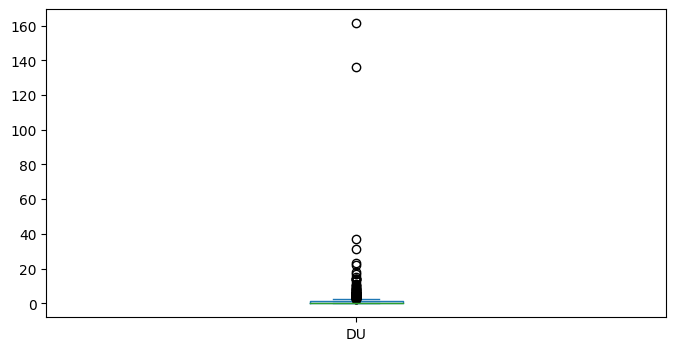

In [ ]:
train["DU"].plot.box(figsize=(8,4))

<Axes: >

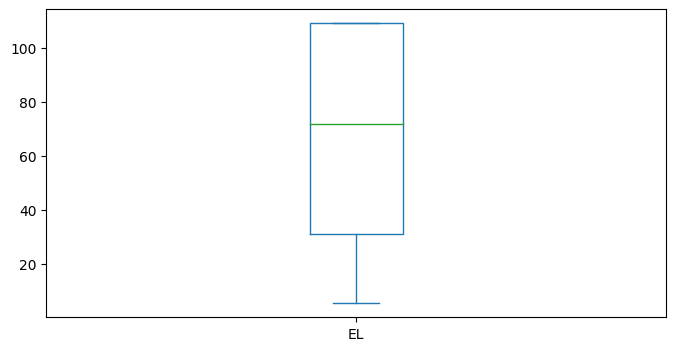

In [ ]:
train["EL"].plot.box(figsize=(8,4))

<Axes: >

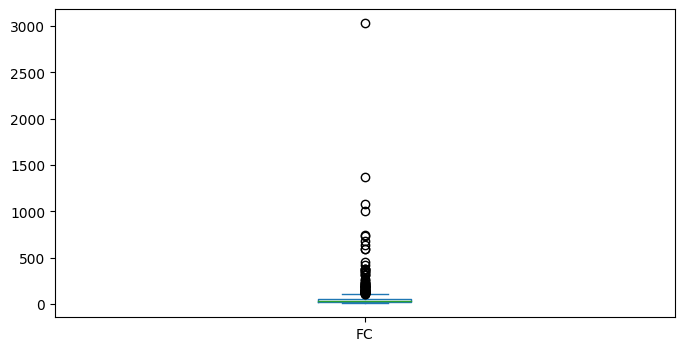

In [ ]:
train["FC"].plot.box(figsize=(8,4))

<Axes: >

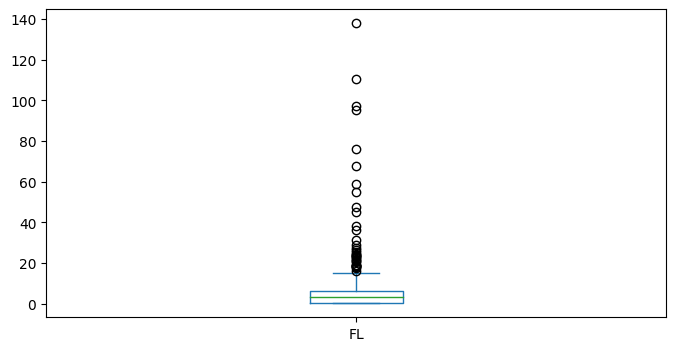

In [ ]:
train["FL"].plot.box(figsize=(8,4))

<Axes: >

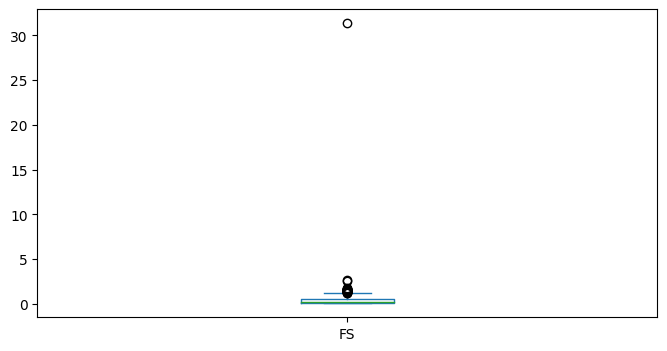

In [ ]:
train["FS"].plot.box(figsize=(8,4))

<Axes: >

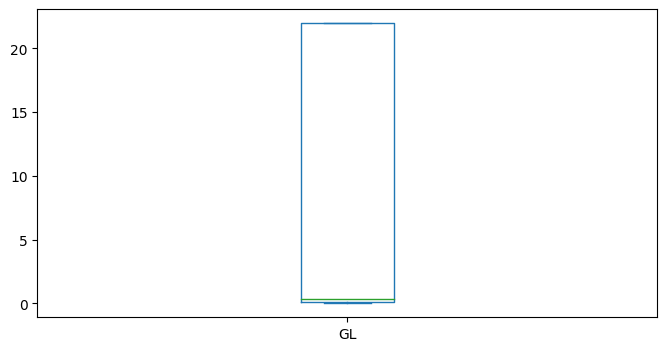

In [ ]:
train["GL"].plot.box(figsize=(8,4))

In [ ]:
train.fillna(np.nan, inplace=True)

# Calculate the correlation matrix using Pearson correlation
corr_matrix = train.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

Correlation Matrix:
             AB        AF        AH        AM        AR        AX        AY  \
AB     1.000000  0.350231  0.249246  0.530687  0.157712  0.471912  0.011004   
AF     0.350231  1.000000  0.044140  0.183961  0.044917  0.248439  0.039417   
AH     0.249246  0.044140  1.000000  0.128268  0.749794  0.039324  0.055385   
AM     0.530687  0.183961  0.128268  1.000000  0.175212  0.225382  0.081666   
AR     0.157712  0.044917  0.749794  0.175212  1.000000  0.011715  0.099947   
AX     0.471912  0.248439  0.039324  0.225382  0.011715  1.000000  0.016315   
AY     0.011004  0.039417  0.055385  0.081666  0.099947  0.016315  1.000000   
AZ     0.158569  0.219172  0.095627  0.131885  0.099282  0.269728  0.036790   
BC     0.331736  0.058831  0.366910  0.329658  0.073730  0.079799  0.132495   
BD     0.278920  0.045430  0.209508  0.277908 -0.002509  0.124581  0.506917   
BN     0.246410  0.131428  0.055154  0.158404  0.048671  0.143351  0.042365   
BP     0.412869  0.241027  0.223

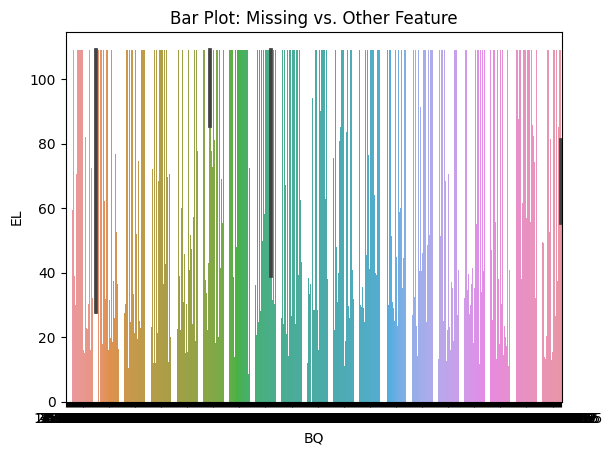

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'train' is your dataset DataFrame

# Bar Plot
sns.barplot(x='BQ', y='EL', data=train)
plt.title('Bar Plot: Missing vs. Other Feature')
plt.show()

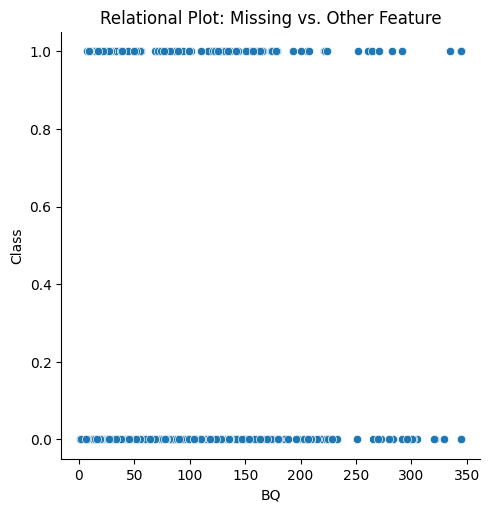

In [ ]:
# Assuming 'df' is your dataset DataFrame
sns.relplot(x='BQ', y='Class', data=train, kind='scatter')
plt.title('Relational Plot: Missing vs. Other Feature')
plt.show()

#Dropping the Id coloumn

In [ ]:
import pandas as pd

# Assuming your dataset is stored in a pandas DataFrame called 'train'
column_name = 'Id'
train = train.drop(column_name, axis=1)  # axis=1 indicates dropping a column

# The modified DataFrame 'train' will no longer contain the dropped column

#Filling the missing values

In [ ]:
train["FS"].fillna(train["FS"].mean(),inplace=True)
train["GL"].fillna(train["GL"].mean(),inplace=True)
train["FL"].fillna(train["FL"].median(),inplace=True)
train["FC"].fillna(train["FC"].median(),inplace=True)
train["DU"].fillna(train["DU"].median(),inplace=True)
train["CC"].fillna(train["CC"].median(),inplace=True)
train["CB"].fillna(train["CB"].median(),inplace=True)

In [ ]:
!pip install fancyimpute

import pandas as pd
from fancyimpute import IterativeImputer

# Assuming 'train' is your dataset DataFrame

# Select the features with missing values
features_with_missing = ['BQ', 'EL']

# Create the iterative imputer
imputer = IterativeImputer()

# Perform multiple imputations
imputed_data = imputer.fit_transform(train[features_with_missing])

# Create a DataFrame with imputed values
imputed_df = pd.DataFrame(imputed_data, columns=features_with_missing)

# Replace the missing values in the original dataset
train[features_with_missing] = imputed_df

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 7.1 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29880 sha256=2bf575a65a9bc7957db1da3b3d4c8b1bfe22aeef63c90a9bc995b60f4edddf61
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11335 sha256=1d2f416cd9e11fb77996189e703690d3b672db90f3b5c6154eb8e9dc0e456307
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


##One hot encoding

In [ ]:
import pandas as pd

train = pd.get_dummies(train, columns=['EJ'])

In [ ]:
column_name = 'EJ_A'
train = train.drop(column_name, axis=1)

In [ ]:
train.head().T

,0,1,2,3,4
AB,0.209377,0.145282,0.470030,0.252107,0.380297
AF,3109.033290,978.764160,2635.106540,3819.651770,3733.048440
AH,85.200147,85.200147,85.200147,120.201618,85.200147
AM,22.394407,36.968889,32.360553,77.112203,14.103738
AR,8.138688,8.138688,8.138688,8.138688,8.138688
AX,0.699861,3.632190,6.732840,3.685344,3.942255
AY,0.025578,0.025578,0.025578,0.025578,0.054810
AZ,9.812214,13.517790,12.824570,11.053708,3.396778
BC,5.555634,1.229900,1.229900,1.229900,102.151980
BD,4126.587310,5496.928240,5135.780240,4169.677380,5728.734120


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 57 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AB      617 non-null    float64
 1   AF      617 non-null    float64
 2   AH      617 non-null    float64
 3   AM      617 non-null    float64
 4   AR      617 non-null    float64
 5   AX      617 non-null    float64
 6   AY      617 non-null    float64
 7   AZ      617 non-null    float64
 8   BC      617 non-null    float64
 9   BD      617 non-null    float64
 10  BN      617 non-null    float64
 11  BP      617 non-null    float64
 12  BQ      617 non-null    float64
 13  BR      617 non-null    float64
 14  BZ      617 non-null    float64
 15  CB      617 non-null    float64
 16  CC      617 non-null    float64
 17  CD      617 non-null    float64
 18  CF      617 non-null    float64
 19  CH      617 non-null    float64
 20  CL      617 non-null    float64
 21  CR      617 non-null    float64
 22  CS

In [ ]:
import pandas as pd

# Rename the 'EJ_B' column to 'EJ'
train.rename(columns={'EJ_B': 'EJ'}, inplace=True)

# Convert the data type of 'EJ' column from uint8 to float64
train['EJ'] = train['EJ'].astype('float64')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 57 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AB      617 non-null    float64
 1   AF      617 non-null    float64
 2   AH      617 non-null    float64
 3   AM      617 non-null    float64
 4   AR      617 non-null    float64
 5   AX      617 non-null    float64
 6   AY      617 non-null    float64
 7   AZ      617 non-null    float64
 8   BC      617 non-null    float64
 9   BD      617 non-null    float64
 10  BN      617 non-null    float64
 11  BP      617 non-null    float64
 12  BQ      617 non-null    float64
 13  BR      617 non-null    float64
 14  BZ      617 non-null    float64
 15  CB      617 non-null    float64
 16  CC      617 non-null    float64
 17  CD      617 non-null    float64
 18  CF      617 non-null    float64
 19  CH      617 non-null    float64
 20  CL      617 non-null    float64
 21  CR      617 non-null    float64
 22  CS

#Splitting of data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
col_name = "Class"

# find the index no
index_no = train.columns.get_loc(col_name)
print(index_no)

55


In [ ]:
train.shape

(617, 57)

In [ ]:
x = train.iloc[:, :55].values  # Independent variables
extra_feature = train.iloc[:, 56].values  # Additional feature

# Update 'x' to include 'extra_feature'
x = np.column_stack((x,extra_feature))

In [ ]:
x.size

34552

In [ ]:
34552/617

56.0

In [ ]:
y=train.iloc[:,55].values #dependent variable

In [ ]:
# Split the data into training and testing sets
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
x_train.size

25872

In [ ]:
34552*3/4

25914.0

#Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
stndrd=StandardScaler()
x_train=stndrd.fit_transform(x_train)
x_test=stndrd.transform(x_test)

#Imbalanced Dataset


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Create the combined sampling pipeline
combined_sampler = [('under', RandomUnderSampler()), ('over', SMOTE())]

# Perform combined undersampling and oversampling on the training data
x_train_resampled, y_train_resampled = SMOTE(sampling_strategy=0.8).fit_resample(x_train, y_train)
x_train_resampled, y_train_resampled = RandomUnderSampler(sampling_strategy=0.8).fit_resample(x_train_resampled, y_train_resampled)

In [ ]:
x_train_resampled.size

38640

In [ ]:
38640/56

690.0

In [ ]:
y_train_resampled.size

690

#Training of Model

Normal

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

# Define the models
models = [
    ('SVM', SVC()),
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest (Entropy)', RandomForestClassifier(criterion='entropy')),
    ('Random Forest (Gini)', RandomForestClassifier(criterion='gini')),
    ('Naive Bayes', GaussianNB()),
    ('XGBoost', xgb.XGBClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier())
]

# Train and evaluate each model with cross-validation
for name, model in models:
    print(f"Training model: {name}")

    # Perform cross-validation
    scores = cross_val_score(model, x_train, y_train, cv=5)

    # Fit the model on the training data
    model.fit(x_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(x_test)

    # Evaluate the model performance
    report = classification_report(y_test, y_pred)
    print("Cross-Validation Scores:", scores)
    print("Average Cross-Validation Score:", scores.mean())
    print(report)
    print("---------------------------------------")


Training model: SVM
Cross-Validation Scores: [0.89247312 0.88172043 0.86956522 0.88043478 0.83695652]
Average Cross-Validation Score: 0.8722300140252456
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       125
           1       0.88      0.47      0.61        30

    accuracy                           0.88       155
   macro avg       0.88      0.73      0.77       155
weighted avg       0.88      0.88      0.87       155

---------------------------------------
Training model: Logistic Regression
Cross-Validation Scores: [0.87096774 0.83870968 0.85869565 0.86956522 0.90217391]
Average Cross-Validation Score: 0.8680224403927068
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       125
           1       0.81      0.73      0.77        30

    accuracy                           0.92       155
   macro avg       0.88      0.85      0.86       155
weighted avg       0.91      0.92      

Weights and Sampling

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

# Define the models
models = [
    ('SVM', SVC(class_weight='balanced')),
    ('Logistic Regression', LogisticRegression(class_weight='balanced')),
    ('Decision Tree', DecisionTreeClassifier(class_weight='balanced')),
    ('Random Forest', RandomForestClassifier(class_weight='balanced')),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('XGBoost', xgb.XGBClassifier())
]

# Train and evaluate each model
for name, model in models:
    print(f"Training model: {name}")
    model.fit(x_train_resampled, y_train_resampled)
    y_pred = model.predict(x_test)
    report = classification_report(y_test, y_pred)
    print(report)
    print("---------------------------------------")

Training model: SVM
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       125
           1       0.76      0.73      0.75        30

    accuracy                           0.90       155
   macro avg       0.85      0.84      0.84       155
weighted avg       0.90      0.90      0.90       155

---------------------------------------
Training model: Logistic Regression
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       125
           1       0.74      0.83      0.78        30

    accuracy                           0.91       155
   macro avg       0.85      0.88      0.86       155
weighted avg       0.92      0.91      0.91       155

---------------------------------------
Training model: Decision Tree
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       125
           1       0.65      0.67      0.66        30

    accuracy    

Sampling

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

# Define the models
models = [
    ('SVM', SVC()),
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest (Entropy)', RandomForestClassifier(criterion='entropy')),
    ('Random Forest (Gini)', RandomForestClassifier(criterion='gini')),
    ('Naive Bayes', GaussianNB()),
    ('XGBoost', xgb.XGBClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier())
]

# Train and evaluate each model with cross-validation
for name, model in models:
    print(f"Training model: {name}")

    # Perform cross-validation
    scores = cross_val_score(model, x_train_resampled, y_train_resampled, cv=5)

    # Fit the model on the training data
    model.fit(x_train_resampled, y_train_resampled)

    # Make predictions on the test data
    y_pred = model.predict(x_test)

    # Evaluate the model performance
    report = classification_report(y_test, y_pred)
    print("Cross-Validation Scores:", scores)
    print("Average Cross-Validation Score:", scores.mean())
    print(report)
    print("---------------------------------------")

Training model: SVM
Cross-Validation Scores: [0.95652174 0.93478261 0.92753623 0.94202899 0.92028986]
Average Cross-Validation Score: 0.9362318840579711
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       125
           1       0.81      0.73      0.77        30

    accuracy                           0.92       155
   macro avg       0.88      0.85      0.86       155
weighted avg       0.91      0.92      0.91       155

---------------------------------------
Training model: Logistic Regression
Cross-Validation Scores: [0.91304348 0.86231884 0.9057971  0.88405797 0.87681159]
Average Cross-Validation Score: 0.8884057971014492
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       125
           1       0.78      0.83      0.81        30

    accuracy                           0.92       155
   macro avg       0.87      0.89      0.88       155
weighted avg       0.92      0.92      

Weight

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

# Define the models
models = [
    ('SVM', SVC(class_weight='balanced')),
    ('Logistic Regression', LogisticRegression(class_weight='balanced')),
    ('Decision Tree', DecisionTreeClassifier(class_weight='balanced')),
    ('Random Forest', RandomForestClassifier(class_weight='balanced')),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('XGBoost', xgb.XGBClassifier())
]

# Train and evaluate each model
for name, model in models:
    print(f"Training model: {name}")
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    report = classification_report(y_test, y_pred)
    print(report)
    print("---------------------------------------")

Training model: SVM
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       125
           1       0.79      0.73      0.76        30

    accuracy                           0.91       155
   macro avg       0.86      0.84      0.85       155
weighted avg       0.91      0.91      0.91       155

---------------------------------------
Training model: Logistic Regression
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       125
           1       0.71      0.83      0.77        30

    accuracy                           0.90       155
   macro avg       0.84      0.88      0.85       155
weighted avg       0.91      0.90      0.91       155

---------------------------------------
Training model: Decision Tree
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       125
           1       0.77      0.67      0.71        30

    accuracy    

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Define the models with their respective parameter grids
models = [
    {
        'name': 'SVM',
        'model': SVC(),
        'param_grid': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    },
    {
        'name': 'Logistic Regression',
        'model': LogisticRegression(),
        'param_grid': {
            'C': [0.1, 1, 10],
            'penalty': ['l1', 'l2']
        }
    },
    {
        'name': 'Decision Tree',
        'model': DecisionTreeClassifier(),
        'param_grid': {
            'max_depth': [3, 5, 7, 20],
            'min_samples_split': [2, 5, 10, 5],
            'min_samples_leaf': [1, 2, 4, 2]
        }
    },
    {
        'name': 'Naive Bayes',
        'model': GaussianNB(),
        'param_grid': {}
    },
    {
        'name': 'XGBoost',
        'model': xgb.XGBClassifier(),
        'param_grid': {
            'n_estimators': [100, 200, 300, 270],
            'max_depth': [3, 5, 7, 20],
            'learning_rate': [0.01, 0.1, 1.0]
        }
    },
    {
        'name': 'Gradient Boosting',
        'model': GradientBoostingClassifier(),
        'param_grid': {
            'n_estimators': [100, 200, 300],
            'max_depth': [3, 5, 7]
        }
    }
]

# Train and evaluate each model with hyperparameter tuning
for model_info in models:
    print(f"Training model: {model_info['name']}")

    # Perform randomized search to find the best parameters
    randomized_search = RandomizedSearchCV(model_info['model'], model_info['param_grid'], cv=5, n_iter=10)
    randomized_search.fit(x_train_resampled, y_train_resampled)
    # Print the best parameters and score
    print("Best Parameters:", randomized_search.best_params_)
    print("Best Score:", randomized_search.best_score_)

    # Make predictions on the test data using the best model
    best_model = randomized_search.best_estimator_
    y_pred = best_model.predict(x_test)

    # Evaluate the model performance
    print(classification_report(y_test, y_pred))
    print("----------------------------------")

Training model: SVM
Best Parameters: {'kernel': 'rbf', 'C': 10}
Best Score: 0.9536231884057971
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       125
           1       0.90      0.60      0.72        30

    accuracy                           0.91       155
   macro avg       0.91      0.79      0.83       155
weighted avg       0.91      0.91      0.90       155

----------------------------------
Training model: Logistic Regression
Best Parameters: {'penalty': 'l2', 'C': 10}
Best Score: 0.9
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       125
           1       0.77      0.80      0.79        30

    accuracy                           0.92       155
   macro avg       0.86      0.87      0.87       155
weighted avg       0.92      0.92      0.92       155

----------------------------------
Training model: Decision Tree
Best Parameters: {'min_samples_split': 5, 'min_samples_

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define the models with their respective parameter grids
models = [
    {
        'name': 'Random Forest (Entropy)',
        'model': RandomForestClassifier(criterion='entropy'),
        'param_grid': {
            'n_estimators': [100, 200, 300, 60, 80],
            'max_depth': [None, 5, 10, 12],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    {
        'name': 'Random Forest (Gini)',
        'model': RandomForestClassifier(criterion='gini'),
        'param_grid': {
            'n_estimators': [100, 200, 300, 80],
            'max_depth': [None, 5, 10, 10],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    }
]

# Train and evaluate each model with hyperparameter tuning
for model_info in models:
    print(f"Training model: {model_info['name']}")

    # Perform randomized search to find the best parameters
    randomized_search = RandomizedSearchCV(model_info['model'], model_info['param_grid'], cv=5, n_iter=10)
    randomized_search.fit(x_train_resampled, y_train_resampled)
    # Print the best parameters and score
    print("Best Parameters:", randomized_search.best_params_)
    print("Best Score:", randomized_search.best_score_)

    # Make predictions on the test data using the best model
    best_model = randomized_search.best_estimator_
    y_pred = best_model.predict(x_test)

    # Evaluate the model performance
    print(classification_report(y_test, y_pred))
    print("----------------------------------")

Training model: Random Forest (Entropy)
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Best Score: 0.9478260869565217
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       125
           1       0.84      0.87      0.85        30

    accuracy                           0.94       155
   macro avg       0.90      0.91      0.91       155
weighted avg       0.94      0.94      0.94       155

----------------------------------
Training model: Random Forest (Gini)
Best Parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10}
Best Score: 0.944927536231884
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       125
           1       0.90      0.90      0.90        30

    accuracy                           0.96       155
   macro avg       0.94      0.94      0.94       155
weighted avg       0

#Submission

In [ ]:
!pip install tensorflow_decision_forests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 53.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 77.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 94.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 38.4 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard
    F

In [ ]:
import tensorflow_decision_forests as tfdf
import pandas as pd

# Read the test dataset
test_df = pd.read_csv('/content/test.csv')
FEATURE_COLUMNS =['Id' ,'AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD ', 'BN ',
       'BP', 'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS',
       'CU', 'CW ', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY',
       'EB', 'EE', 'EG', 'EH', 'EJ', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI',
       'FL', 'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL', 'Class']
# Select the desired feature columns
TEST_FEATURE_COLUMNS = [col for col in test_df.columns if col in FEATURE_COLUMNS and col != "Class"]
test_ds_pd = test_df[TEST_FEATURE_COLUMNS]
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd)

# # Make predictions using the 'fold_1' model
# predictions = models['fold_1'].predict(test_ds)

# # Create a DataFrame for submission
# submission_df = pd.DataFrame({
#  'Id': test_df['Id'],
#  'class_0': predictions[:, 0],
#  'class_1': predictions[:, 1]
# })

# # Save the submission file
# submission_df.to_csv('/content/submission.csv', index=False)

In [ ]:
predictions = best_model.predict(test_ds_pd)
n_predictions= [[round(abs(i-1), 8), i] for i in predictions.ravel()]

ValueError: ignored

In [ ]:
# # Predict probabilities on the test set
# test_pred_prob = models.predict_proba(test)[:, 1]

# # Create a submission DataFrame
# submission = pd.DataFrame({'Id': test_ids, 'class_0': 1 - test_pred_prob, 'class_1': test_pred_prob})

# # Save the submission to a CSV file
# submission.to_csv('submission.csv', index=False)

In [ ]:
sample_submission = pd.read_csv("/content/sample_submission.csv")
sample_submission[['class_0', 'class_1']] = n_predictions
sample_submission.to_csv('/content/submission.csv',index=False)

In [ ]:
# Weights and Sampling -> Gradient Boost

In [ ]:
# Sampling -> Random forest(entropy)

In [ ]:
 test.head()